In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

In [2]:
data= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Codes/kaggle/Titanic/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Exploratory data analysis

In [4]:
data.shape

(891, 12)

Let's analyze how may categories each feature has.

In [12]:
len(data['PassengerId'].unique())

891

In [14]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [16]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [18]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
len(data['Ticket'].unique())

681

In [21]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [22]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [25]:
data['Age'].max(), data['Age'].min()

(80.0, 0.42)

In [52]:
data['Fare'].max(), data['Fare'].min()

(512.3292, 0.0)

Let's visualize data and gain a better insight about who survived!

([<matplotlib.patches.Wedge at 0x1bf0abf5a90>,
 [Text(-1.12098,-0.428264,'Died'), Text(1.02756,0.392575,'Survived')],
 [Text(-0.653903,-0.24982,'61.6%'), Text(0.560489,0.214132,'38.4%')])

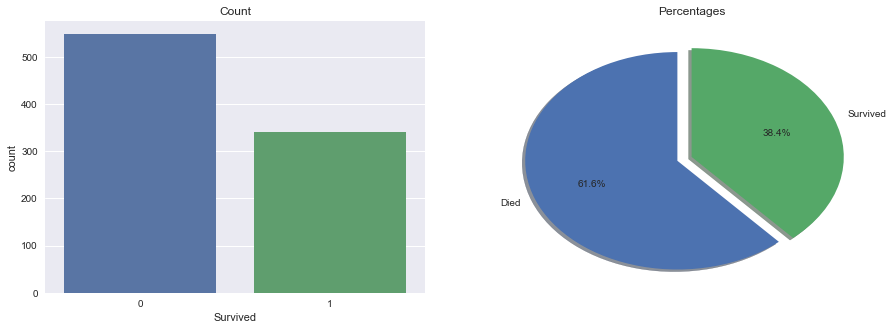

In [62]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].set_title("Count")
sns.countplot(data['Survived'], ax=ax[0])
ax[1].set_title("Percentages")
plt.pie(data['Survived'].value_counts(),labels=['Died','Survived'],explode=(0.1,0),
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

Above plot shows that more than 61% people failed to survive in that tragic incident.

Let's get a deep insight about people who survived and who couldn't.

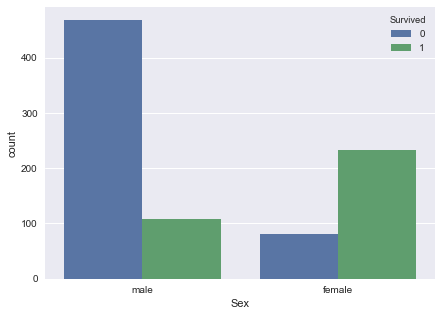

In [40]:
plt.figure(figsize=[7,5])
sns.countplot(data['Sex'], hue=data['Survived'])

Above plot shows that there were more men than women in that ship and majority of them failed to save their lives.

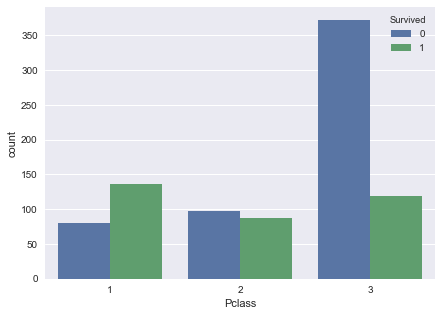

In [41]:
plt.figure(figsize=[7,5])
sns.countplot(data['Pclass'], hue=data['Survived'])

Above plot shows that there were lower class people in abundant and majority of them died while the ratio of survived and died people of higher and middle class is almost same.

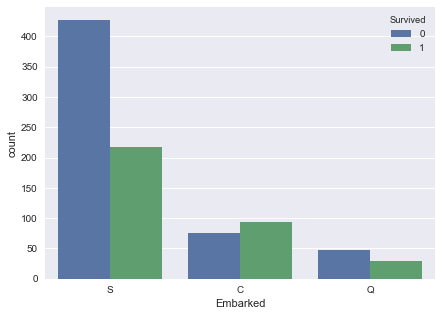

In [42]:
plt.figure(figsize=[7,5])
sns.countplot(data['Embarked'], hue=data['Survived'])

Above plot shows that pople of category S were in abundant and half of them died.

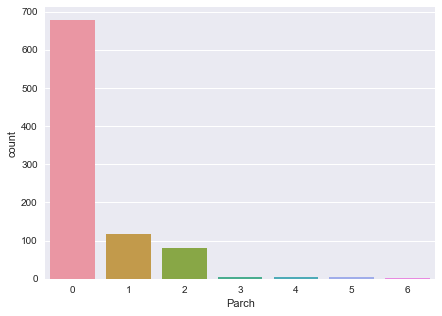

In [47]:
plt.figure(figsize=[7,5])
sns.countplot(data['Parch'])

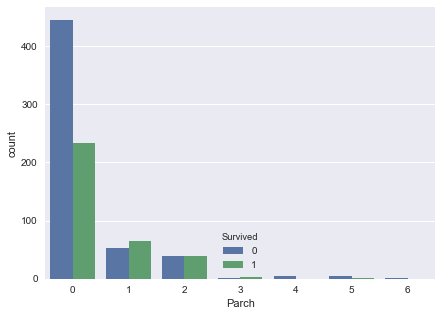

In [48]:
plt.figure(figsize=[7,5])
sns.countplot(data['Parch'], hue=data['Survived'])

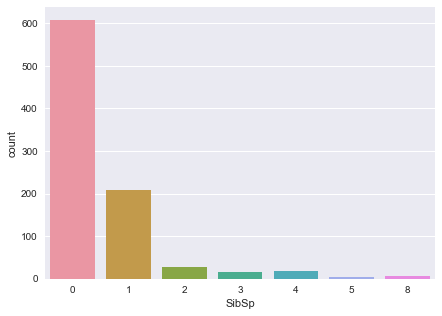

In [50]:
plt.figure(figsize=[7,5])
sns.countplot(data['SibSp'])

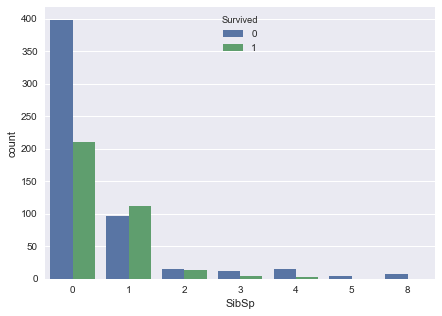

In [66]:
plt.figure(figsize=[7,5])
sns.countplot(data['SibSp'], hue=data['Survived'])

Above plots show that there were more people in the ship who were alone and half of them died.

#### Feature Engineering and Data Cleaning

Let's see if there exist any missing value in our data and do some feature engineering!